In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston
from sklearn.metrics  import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import linear_model

In [10]:
#Load the Dataset
boston =  load_boston()
#Description of Data
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [17]:
feature = pd.DataFrame(boston.data,columns=boston.feature_names)
feature

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
target = pd.DataFrame(boston.target,columns=["target"])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [13]:
#concatenate features and dataset into one DataFrame
df = pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


             CRIM        ZN     INDUS  ...         B     LSTAT    target
CRIM     1.000000 -0.200469  0.406583  ... -0.385064  0.455621 -0.388305
ZN      -0.200469  1.000000 -0.533828  ...  0.175520 -0.412995  0.360445
INDUS    0.406583 -0.533828  1.000000  ... -0.356977  0.603800 -0.483725
CHAS    -0.055892 -0.042697  0.062938  ...  0.048788 -0.053929  0.175260
NOX      0.420972 -0.516604  0.763651  ... -0.380051  0.590879 -0.427321
RM      -0.219247  0.311991 -0.391676  ...  0.128069 -0.613808  0.695360
AGE      0.352734 -0.569537  0.644779  ... -0.273534  0.602339 -0.376955
DIS     -0.379670  0.664408 -0.708027  ...  0.291512 -0.496996  0.249929
RAD      0.625505 -0.311948  0.595129  ... -0.444413  0.488676 -0.381626
TAX      0.582764 -0.314563  0.720760  ... -0.441808  0.543993 -0.468536
PTRATIO  0.289946 -0.391679  0.383248  ... -0.177383  0.374044 -0.507787
B       -0.385064  0.175520 -0.356977  ...  1.000000 -0.366087  0.333461
LSTAT    0.455621 -0.412995  0.603800  ... -0.36608

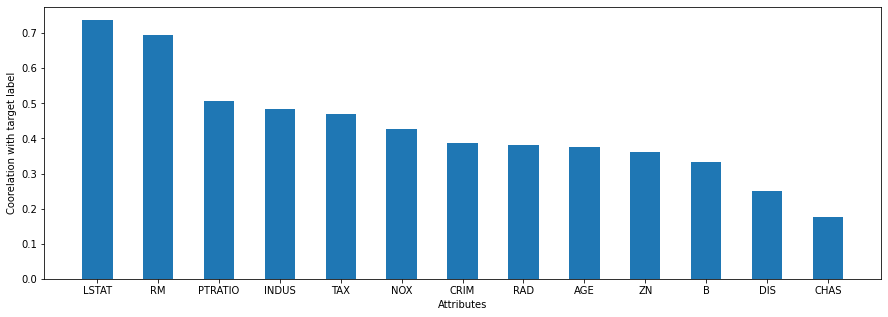

In [9]:
#Obtaion Coorelation between every column in dataset
corr = df.corr('pearson')
#Take absolute values of correlation
corrs = [abs(corr[attr]['target']) for attr in list(features)]
print(corr)
#make list of pairs{(corr, feature)}
l = list(zip(corrs, list(features)))
#Sort the list of pairs in descending order
#with the correlation values as the key for sorting
l.sort(key = lambda x : x[0], reverse=True)
#unzip pairs to two lists
#zip(*l) - takes a list that looks like[[a,b,c],[d,e,f],[h,i,j]]
#and returns [[a,v,m],[q,e,t],[c,o,h]]
corrs, labels = list(zip((*l)))
#plot coorelations with respect to the target variable as bar graph
index = np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Coorelation with target label')
plt.xticks(index,labels)
plt.show()


In [24]:
#scaling the features
standardscaler = preprocessing.StandardScaler() 
features_scale = standardscaler.fit_transform(features)
features_scale

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [25]:
#scaling target
target_scaled = standardscaler.fit_transform(target)
target_scaled

array([[ 0.15968566],
       [-0.10152429],
       [ 1.32424667],
       [ 1.18275795],
       [ 1.48750288],
       [ 0.6712218 ],
       [ 0.03996443],
       [ 0.49708184],
       [-0.65659542],
       [-0.39538548],
       [-0.81985164],
       [-0.39538548],
       [-0.09064054],
       [-0.23212926],
       [-0.47157171],
       [-0.286548  ],
       [ 0.06173193],
       [-0.54775795],
       [-0.25389676],
       [-0.47157171],
       [-0.97222411],
       [-0.31919924],
       [-0.79808414],
       [-0.87427038],
       [-0.75454915],
       [-0.93957286],
       [-0.64571167],
       [-0.84161913],
       [-0.44980422],
       [-0.16682677],
       [-1.07017784],
       [-0.87427038],
       [-1.0157591 ],
       [-1.02664285],
       [-0.98310786],
       [-0.39538548],
       [-0.27566425],
       [-0.16682677],
       [ 0.23587189],
       [ 0.89978051],
       [ 1.34601416],
       [ 0.4426631 ],
       [ 0.30117438],
       [ 0.23587189],
       [-0.14505928],
       [-0

In [0]:
#data spliting
x_train, x_test, y_train, y_test = train_test_split(features_scale,target_scaled,test_size=0.2) 

In [28]:
len(x_train)#Length of Trainging data

404

In [0]:
regress = linear_model.LinearRegression()

In [33]:
#curving the training dataset on linear regression model
regress.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
regress.coef_

array([[-0.1095769 ,  0.12183629,  0.02512981,  0.05530098, -0.23349867,
         0.25490748,  0.02141364, -0.34706861,  0.33329171, -0.23924293,
        -0.24243032,  0.09239509, -0.45005896]])

In [35]:
#predictions
target_prediction_scale = regress.predict(x_test)
target_prediction_scale

array([[-0.45528941],
       [-0.27240526],
       [-0.46997122],
       [-1.24877406],
       [ 2.01119269],
       [-0.15060347],
       [ 0.0338179 ],
       [ 0.23531553],
       [ 0.84677594],
       [-0.70083778],
       [-1.35654214],
       [ 0.50219645],
       [-0.76094296],
       [ 1.5461559 ],
       [-1.05601623],
       [ 0.19806821],
       [-0.73272228],
       [-0.46103812],
       [-0.91692446],
       [ 1.10213223],
       [-1.02254122],
       [-0.2264229 ],
       [ 0.46945733],
       [-0.70018726],
       [ 0.36293023],
       [-0.2746821 ],
       [ 0.45000567],
       [-0.69315488],
       [ 0.08219844],
       [-0.07680517],
       [ 0.83809438],
       [-1.0211343 ],
       [ 0.26739543],
       [ 0.94876623],
       [ 0.15928729],
       [ 1.97733334],
       [ 0.55375184],
       [ 0.39773411],
       [ 1.60790716],
       [-0.43407318],
       [-0.93358066],
       [-0.16577125],
       [-0.23992575],
       [ 0.2594943 ],
       [ 0.4818435 ],
       [ 0

In [41]:
#mse calculation
mse = mean_squared_error(regress.predict(x_train),y_train)
print(mse)

0.2937706004338937


In [42]:
#general error calculation
gerr = mean_squared_error(regress.predict(x_test),y_test)
print(gerr)

0.2937706004338937


In [43]:
target_predicted = standardscaler.inverse_transform(target_prediction_scale)
target_predicted

array([[18.34960195],
       [20.02994364],
       [18.21470534],
       [11.05905588],
       [41.01166796],
       [21.14905993],
       [22.84352554],
       [24.69488814],
       [30.31299345],
       [16.09350069],
       [10.06888147],
       [27.14699307],
       [15.54125365],
       [36.73890462],
       [12.83011698],
       [24.35265935],
       [15.80054555],
       [18.29678276],
       [14.1080938 ],
       [32.65921001],
       [13.13768576],
       [20.45243014],
       [26.84618572],
       [16.09947767],
       [25.86741343],
       [20.00902402],
       [26.66746366],
       [16.16409126],
       [23.2880465 ],
       [21.8271195 ],
       [30.23322714],
       [13.15061259],
       [24.98963866],
       [31.25008141],
       [23.99633981],
       [40.70056787],
       [27.62068465],
       [26.18719195],
       [37.30627585],
       [18.54453697],
       [13.95505644],
       [21.00969817],
       [20.32836578],
       [24.91704291],
       [26.95998997],
       [24

In [44]:
w = pd.DataFrame(list(zip(y_test, target_prediction_scale)), columns = ['target','predicted'])
w.head(102)

,target,predicted
0,[-0.330082990118712],[-0.45528941230292413]
1,[-0.330082990118712],[-0.2724052608682039]
2,[-0.2974317468631272],[-0.46997121854216045]
3,[-0.6565954226745598],[-1.2487740555641662]
4,[2.989460074199074],[2.0111926883364344]
...,...,...
97,[0.6385705597969696],[0.8937389009733622]
98,[0.7691755328193091],[0.20473426974108264]
99,[1.879317803509191],[1.273878262322543]
100,[0.26852313623367563],[0.36914718812552666]
